# Daten herunterladen: 

https://drive.google.com/open?id=1kCYv7qOFqk_hldi7rKaBkZovVTyndVfP oder

https://shop.swisstopo.admin.ch/de/products/landscape/names3D

swissNAMES3D_LV95

shp_LV95_LN02

Benötigte Dateien:

swissNAMES3D_PKT.dbf

swissNAMES3D_PKT.prj

swissNAMES3D_PKT.shp

swissNAMES3D_PKT.shx

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
%matplotlib inline
import re

In [2]:
# Daten einlesen
gdf = gpd.read_file('shp_LV95_LN02/swissNAMES3D_PKT.shx')


In [3]:
gdf

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
0,{2FF7E3F1-6BAA-4981-A172-A459E01982E8},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694037.021 1273364.505 389.545)
1,{AA4D0B0F-CA43-4B91-BFC3-32B9F3E2FEDB},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{0642FC92-2FC6-4A4D-AE2B-9115F0D0BA2B},Kleinandelfingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694225.446 1272960.581 386.701)
2,{358C0BD3-3DF7-4A49-B446-F156A2D3D865},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{D723A8F6-7E97-41D0-B042-0935835A017A},Winterthur-Töss,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695211.064 1260578.998 436.378)
3,{C4D61C3F-4A22-4474-9FD8-9532845AFFF4},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{4EF0E5A1-1AE2-4793-8073-3CA1AF521FCE},Wülflingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694252.651 1263268.638 412.791)
4,{082BA123-C0B5-47E3-9D86-8AC0DFD1025F},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{4EF0E5A1-1AE2-4793-8073-3CA1AF521FCE},Wülflingen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694494.016 1263591.783 427.094)
5,{674B9162-0FCF-4972-B9A3-FDB9AFE55E89},Verzweigung,TLM_AUS_EINFAHRT,-999998.0,k_W,{1B56A862-5B35-44DD-8767-AB1D1180CCD0},Winterthur-Nord,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2694852.543 1264108.073 438.363)
6,{ACF238B8-5177-4239-ACD1-B402F60F5920},Verzweigung,TLM_AUS_EINFAHRT,-999998.0,k_W,{1B56A862-5B35-44DD-8767-AB1D1180CCD0},Winterthur-Nord,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695091.488 1264580.048 432.101)
7,{1D10A30D-3B35-43AA-9F9D-6DD102D16B58},Verzweigung,TLM_AUS_EINFAHRT,-999998.0,k_W,{1B56A862-5B35-44DD-8767-AB1D1180CCD0},Winterthur-Nord,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695409.576 1264572.464 442.853)
8,{8E730905-A989-4D50-B921-2B8E4BDD5E5F},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AB641F44-EAEA-47DE-80A8-774A18032DA5},Winterthur-Ohringen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2695995.191 1264426.583 458.974)
9,{F36B1E8E-978A-4F18-9060-41B7F8BF2169},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{AB641F44-EAEA-47DE-80A8-774A18032DA5},Winterthur-Ohringen,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2696459.446 1264408.235 472.927)


In [4]:
gdf.shape    ## alle Eintäge

(308200, 12)

In [5]:
len(gdf['NAME'].unique()) # 201100 verschiedene Namen

201100

In [6]:
gdf['OBJEKTART'].unique()

array(['Ausfahrt', 'Verzweigung', 'Ein- und Ausfahrt', 'Zollamt 24h 24h',
       'Zollamt 24h eingeschraenkt', 'Zollamt eingeschraenkt',
       'Verladestation', 'Haltestelle Schiff', 'Haltestelle Bahn',
       'Uebrige Bahnen', 'Haltestelle Bus', 'Flurname swisstopo',
       'Lokalname swisstopo', 'Pass', 'Gipfel', 'Hauptgipfel',
       'Alpiner Gipfel', 'Huegel', 'Haupthuegel', 'Felskopf',
       'Strassenpass', 'Quelle', 'Grotte, Hoehle', 'Wasserfall',
       'Denkmal', 'Brunnen', 'Bildstock', 'Aussichtspunkt',
       'Landesgrenzstein', 'Erratischer Block', 'Felsblock', 'Gebaeude',
       'Offenes Gebaeude', 'Sakrales Gebaeude', 'Kapelle', 'Turm'],
      dtype=object)

# Darstellung auf einer Karte

In [7]:
gdf_name = gdf[gdf['NAME'].str.contains("Albis")]     ## 68 Einträge

In [8]:
gdf_name

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
674,{A8E971B0-784C-4495-A94A-BAC6C594DFB5},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{91AC31C6-1FA9-4477-A2E8-6A33A9E072ED},Affoltern am Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2675699.243 1235900.028 483.220)
675,{C29D546F-1E5B-40E0-BBB9-2ADB0E1150CF},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{91AC31C6-1FA9-4477-A2E8-6A33A9E072ED},Affoltern am Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2675542.884 1236311.728 481.493)
4234,{87A5BEB9-B7D7-434E-B6BC-6037AC85E919},Haltestelle Bahn,TLM_HALTESTELLE,-999998.0,k_W,{9F0E8EB9-3660-457A-95A0-C0E444A515C3},Affoltern am Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2676247.729 1236610.666 494.100)
4442,{164436C3-C255-4144-A00A-4C8FD6CCC6A4},Haltestelle Bahn,TLM_HALTESTELLE,-999998.0,k_W,{2BA3753A-FB8B-441B-A7EB-A8E3C2D68EA6},"Zürich, Albisgütli",offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2680746.083 1245135.121 503.821)
4667,{AA914C98-F559-42F6-BFE2-699B0B61A479},Haltestelle Bahn,TLM_HALTESTELLE,-999998.0,k_W,{6740D116-ACCA-45D6-9245-3C61B1FF3B72},"Zürich, Albisrieden",offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2679024.315 1247607.833 431.845)
4681,{06EE34DD-E8B5-465F-87E7-E8B75849B8DE},Haltestelle Bahn,TLM_HALTESTELLE,-999998.0,k_W,{4E5F0B0D-3008-4A31-9C7E-14F31F4BFBB3},"Zürich, Albisriederplatz",offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2680934.788 1248045.153 411.060)
4682,{BC9881B4-5405-4262-B4CE-43905A6E7338},Haltestelle Bahn,TLM_HALTESTELLE,-999998.0,k_W,{4E5F0B0D-3008-4A31-9C7E-14F31F4BFBB3},"Zürich, Albisriederplatz",offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2680935.941 1248047.753 410.978)
4683,{AA1E1F86-95A6-4ABD-8EFE-74564AD7697B},Haltestelle Bahn,TLM_HALTESTELLE,-999998.0,k_W,{4E5F0B0D-3008-4A31-9C7E-14F31F4BFBB3},"Zürich, Albisriederplatz",offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2680928.384 1248036.953 411.197)
4684,{0D3987AB-1833-4CFE-943C-A85F37445E50},Haltestelle Bahn,TLM_HALTESTELLE,-999998.0,k_W,{4E5F0B0D-3008-4A31-9C7E-14F31F4BFBB3},"Zürich, Albisriederplatz",offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2680926.989 1248033.885 411.197)
5893,{6FCBC968-53CC-4630-980D-04B26ABA05A9},Haltestelle Bus,TLM_HALTESTELLE,-999998.0,k_W,{30A3CEDA-8BE0-418A-8A00-A1FBE99E9445},"Langnau am Albis, Mittelalbis",offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (2682408.000 1236671.000 737.493)


In [9]:
gdf_kantone = gpd.read_file('Projections/shp/g1k17.shp')  # Karte mit Kantonen

In [10]:
gdf_kantone['KTNAME'].unique()

array(['Zürich', 'Bern / Berne', 'Luzern', 'Uri', 'Schwyz', 'Obwalden',
       'Nidwalden', 'Glarus', 'Zug', 'Fribourg / Freiburg', 'Solothurn',
       'Basel-Stadt', 'Basel-Landschaft', 'Schaffhausen',
       'Appenzell Ausserrhoden', 'Appenzell Innerrhoden', 'St. Gallen',
       'Graubünden / Grigioni / Grischun', 'Aargau', 'Thurgau', 'Ticino',
       'Vaud', 'Valais / Wallis', 'Neuchâtel', 'Genève', 'Jura'],
      dtype=object)

In [11]:
gdf_kantone.head(3)

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,Z_MAX,Z_AVG,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,1,Zürich,4,172894,669244,716900,223896,283343,691800,252000,...,1291,533,504,2669244,2716900,1223896,1283343,2691800,1252000,"POLYGON ((692429.202 281173.707, 692993.467 28..."
1,2,Bern / Berne,2,595952,556241,677745,130585,243834,614200,185600,...,4271,1198,979,2556241,2677745,1130585,1243834,2614200,1185600,"MULTIPOLYGON (((573502.204 194804.720, 573996...."
2,3,Luzern,6,149352,630127,681764,180569,237691,651000,213100,...,2348,770,680,2630127,2681764,1180569,1237691,2651000,1213100,"POLYGON ((662037.558 237690.723, 662271.728 23..."


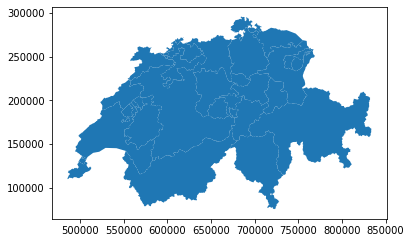

In [12]:
gdf_kantone.plot()

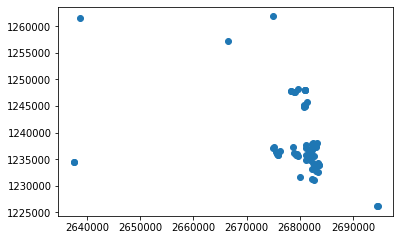

In [13]:
gdf_name.plot()

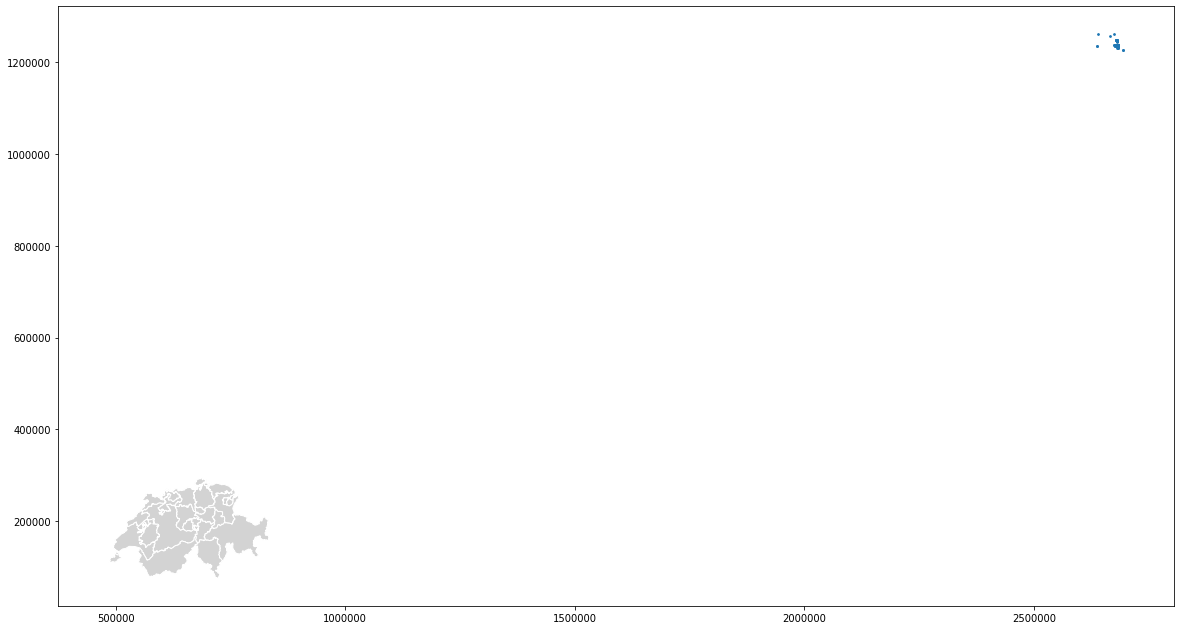

In [14]:
ax = gdf_kantone.plot(figsize=(20,15), color='lightgrey', edgecolor='white')
gdf_name.plot(markersize=3, ax=ax)

In [15]:
gdf_kantone.crs

{'init': 'epsg:21781'}

In [16]:
gdf_name.crs 

{'init': 'epsg:2056'}

In [17]:
## Projektionen angleichen
gdf_name = gdf_name.to_crs({'init': 'epsg:21781'}) 

/home/pc/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [18]:
gdf_name.head(2)

,UUID,OBJEKTART,OBJEKTKLAS,HOEHE,GEBAEUDENU,NAME_UUID,NAME,STATUS,SPRACHCODE,NAMEN_TYP,NAMENGRUPP,geometry
674,{A8E971B0-784C-4495-A94A-BAC6C594DFB5},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{91AC31C6-1FA9-4477-A2E8-6A33A9E072ED},Affoltern am Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (675699.243 235900.028 483.220)
675,{C29D546F-1E5B-40E0-BBB9-2ADB0E1150CF},Ausfahrt,TLM_AUS_EINFAHRT,-999998.0,k_W,{91AC31C6-1FA9-4477-A2E8-6A33A9E072ED},Affoltern am Albis,offiziell,Hochdeutsch inkl. Lokalsprachen,Einfacher Name,None,POINT Z (675542.884 236311.728 481.493)


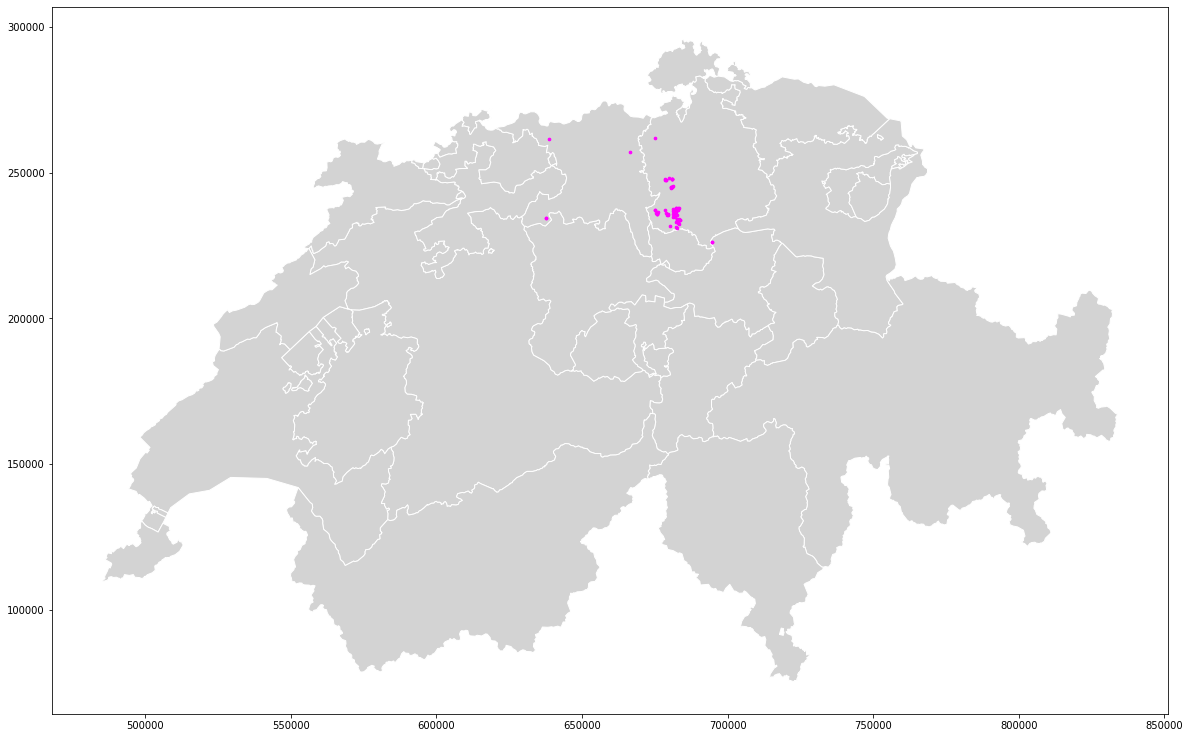

In [19]:
ax = gdf_kantone.plot(figsize=(20,15), color='lightgrey', edgecolor='white')
gdf_name.plot(markersize=7, color='magenta', ax=ax)

# Weitere Versuche mit dem Inhalt des Datensatzes

# Röschtigraben

In [20]:
gdf_deutsch = gdf[gdf['SPRACHCODE'] == 'Hochdeutsch inkl. Lokalsprachen']

In [21]:
len(gdf_deutsch)

206580

In [22]:
gdf_deutsch = gdf_deutsch.to_crs({'init': 'epsg:21781'})

/home/pc/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


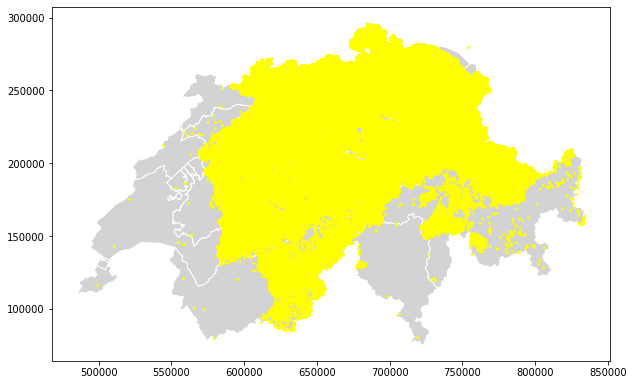

In [23]:
ax = gdf_kantone.plot(figsize=(10,7), color='lightgrey', edgecolor='white',linewidth=1)
gdf_deutsch.plot(markersize=3, color='yellow', ax=ax)

# Leuchttürme

In [24]:
gdf_leuchtturm = gdf[gdf['GEBAEUDENU'] == 'Leuchtturm']
gdf_leuchtturm = gdf_leuchtturm.to_crs({'init': 'epsg:21781'})


/home/pc/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [25]:
len(gdf_leuchtturm)

2

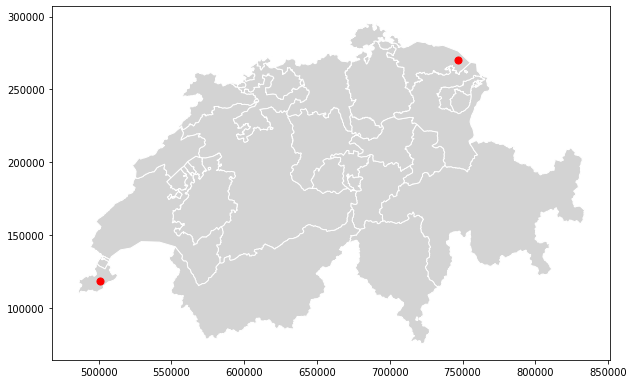

In [26]:
ax = gdf_kantone.plot(figsize=(10,7), color='lightgrey', edgecolor='white',linewidth=1)
gdf_leuchtturm.plot(markersize=50, color='red', ax=ax)

# Landesgrenzsteine

In [27]:
gdf_grenzstein = gdf[gdf['OBJEKTART'] == 'Landesgrenzstein']
gdf_grenzstein = gdf_grenzstein.to_crs({'init': 'epsg:21781'})

/home/pc/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [28]:
len(gdf_grenzstein)

6978

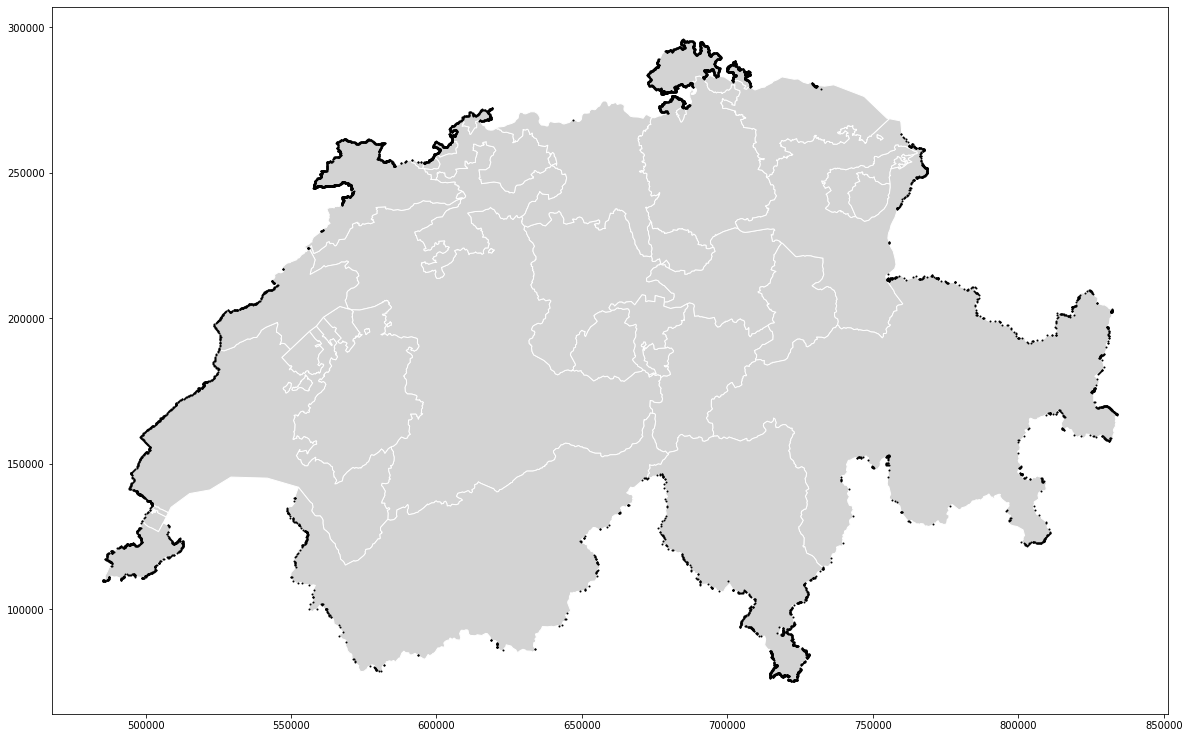

In [29]:
ax = gdf_kantone.plot(figsize=(20,15), color='lightgrey', edgecolor='white',linewidth=1)
gdf_grenzstein.plot(markersize=1, color='black', ax=ax)



In [ ]:
## In Spalte suchen

# str.find()

# Ortstypen farbig unterscheiden

In [ ]:
colors = {
    'retail': 'blue',
    'pronto': 'green',
    'id': 'orange',
    'restaurant': 'red',
    'impo': 'darkblue',
    'vitality': 'darkgreen',
    'bh': 'black',
    'christ': 'black',
    'city': 'black',
    'livique': 'black',
    'togo': 'black',
    'lumimart': 'black',
    'takeit': 'black',
    'marche': 'black',
    'hotel': 'black',
    'capuccini': 'black',
    'burger': 'black',
    'toptip': 'black',
    'cindy': 'black',
    'sapori': 'black',
    'zopf': 'black',
    'karma': 'black',
    'halba': 'black',
    'perpiedi': 'black'
}

In [ ]:
colorlist = gdf_stores['typ'].apply(lambda typ: colors[typ])

In [ ]:
colorlist.value_counts(dropna=False)

In [ ]:
# Ortstypen farbig unterscheiden

colors = {
    'retail': 'blue',
    'pronto': 'green',
    'id': 'orange',
    'restaurant': 'red',
    'impo': 'darkblue',
    'vitality': 'darkgreen',
    'bh': 'black',
    'christ': 'black',
    'city': 'black',
    'livique': 'black',
    'togo': 'black',
    'lumimart': 'black',
    'takeit': 'black',
    'marche': 'black',
    'hotel': 'black',
    'capuccini': 'black',
    'burger': 'black',
    'toptip': 'black',
    'cindy': 'black',
    'sapori': 'black',
    'zopf': 'black',
    'karma': 'black',
    'halba': 'black',
    'perpiedi': 'black'
}

colorlist = gdf_stores['typ'].apply(lambda typ: colors[typ])

colorlist.value_counts(dropna=False)